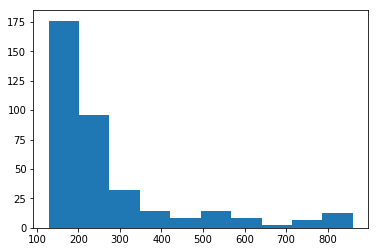

(870, 370)


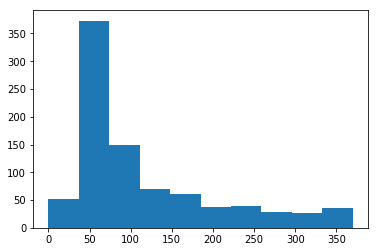

(870, 370)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('Coffee/original_data/coffee_alignment_BN.fasta') as f:
    gene_IDs = []
    sequences = []
    for i, line in enumerate(f):
        if (i % 2) == 0:
            gene_IDs.append(line[:-1])
        else:
            sequences.append(list(line[:-1]))
data = pd.DataFrame(sequences)
data["gene_IDs"] = gene_IDs
data = data.set_index("gene_IDs")

# extract AtZAR1 position
data = data.loc[:, data.loc[">AtZAR1", :] != "-"]
data
# count "-"
no_data_count = data == "-"
no_data_count = no_data_count.sum()
plt.hist(no_data_count)
plt.show()

# extract amino acid with many gene having
extract_amino = no_data_count < 10000
extract_data = data.loc[:, extract_amino]
print(extract_data.shape)

no_data_count = extract_data == "-"
extract_amino = no_data_count.sum(axis=1) < 28000
plt.hist(no_data_count.sum(axis=1))
plt.show()
extract_data = extract_data.loc[extract_amino, :]
print(extract_data.shape)

# to fasta
with open("Coffee/original_data/coffee_alignment_BN_extractAtZAR1.fasta", mode='w') as f:
    for i in range(extract_data.shape[0]):
        f.write(extract_data.index[i])
        f.write("\n")
        f.write("".join(extract_data.iloc[i, :].tolist()))
        f.write("\n")
